In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

from collections import Counter

import scipy
from umap import UMAP
from sklearn.decomposition import PCA

In [2]:
# Stolen from Isabella
def fill_nan_encode_categories(dataframe):
    # replace nan with -1 -> to keep them recognisable
    result = dataframe.fillna(-1)
    # make all columns a category -> even the numerical ones as they are not continuous numbers
    result = result.astype('category')
    # use pd's codes to make them numeric -> -1 disappears this way
    return result.apply(lambda x: x.cat.codes)

In [3]:
raw_df = pd.read_csv("../data/maps-synthetic-data-v1.1.csv")

In [4]:
# columns = ['has_dep_diag',
#            'musi_week', 
#            'musi_wend', 
#            'read_week', 
#            'read_wend', 
#            'out_sum_week',
#            'out_sum_wend', 
#            'out_win_week', 
#            'out_win_wend'
#           ]

columns = ['has_dep_diag',
           'talk_mob_week',
           'talk_mob_wend',
           'text_week',
           'text_wend',
           'tv_week',
           'tv_wend',
           'comp_week',
           'comp_wend'
          ]

In [5]:
df = raw_df[columns]
df.shape

(13734, 9)

In [6]:
# Shamelessly stolen from Isabella
# replace nan with -1 -> to keep them recognisable

df = raw_df.dropna(how="all", subset=['has_dep_diag'])
df = fill_nan_encode_categories(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4513 entries, 0 to 13732
Data columns (total 85 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Unnamed: 0         4513 non-null   int16
 1   X                  4513 non-null   int16
 2   flag               4513 non-null   int8 
 3   comp_bed_9         4513 non-null   int8 
 4   mat_dep            4513 non-null   int8 
 5   mat_age            4513 non-null   int8 
 6   weight_16          4513 non-null   int16
 7   height_16          4513 non-null   int16
 8   iq                 4513 non-null   int8 
 9   comp_noint_bed_16  4513 non-null   int8 
 10  comp_int_bed_16    4513 non-null   int8 
 11  talk_phon_wend     4513 non-null   int8 
 12  text_wend          4513 non-null   int8 
 13  talk_mob_wend      4513 non-null   int8 
 14  comp_wend          4513 non-null   int8 
 15  musi_wend          4513 non-null   int8 
 16  read_wend          4513 non-null   int8 
 17  work_wend    

In [7]:
df.shape

(4513, 85)

## PCA / UMAP Analysis

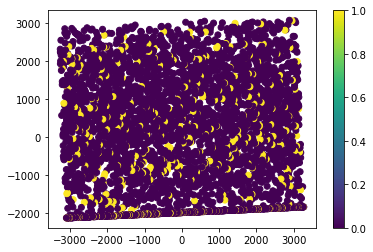

In [19]:
# PCA First

embedder = PCA()
embedder.fit(df)
embedding = embedder.transform(df)

plt.scatter(embedding[:,0],embedding[:,1], c=df['has_dep_diag'])
plt.colorbar()




AttributeError: 'PathCollection' object has no attribute 'savefig'

Well that is not helpful at all

Try UMAP?

In [9]:
embedder = UMAP(n_neighbors=50,n_jobs=6,verbose=True)
embedder.fit(df, y=df['has_dep_diag'])
embedding = embedder.transform(df)

UMAP(n_jobs=6, n_neighbors=50, verbose=True)
Tue May  3 15:36:07 2022 Construct fuzzy simplicial set
Tue May  3 15:36:07 2022 Finding Nearest Neighbors
Tue May  3 15:36:07 2022 Building RP forest with 8 trees
Tue May  3 15:36:07 2022 NN descent for 12 iterations


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


	 1  /  12
	 2  /  12
	Stopping threshold met -- exiting after 2 iterations
Tue May  3 15:36:14 2022 Finished Nearest Neighbor Search
Tue May  3 15:36:15 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Tue May  3 15:36:20 2022 Finished embedding


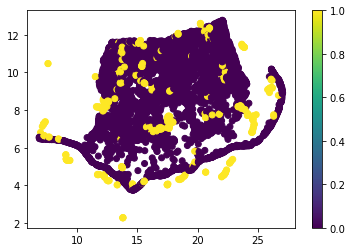

In [10]:
# 0 is no depression, 1 = depression

plt.scatter(embedding[:,0],embedding[:,1], c=df['has_dep_diag']) 
plt.colorbar()

In [11]:
from hdbscan import HDBSCAN

In [12]:
# embedding[df['has_dep_diag'] != 0 removes the NaN from the plot

clusterer = HDBSCAN(min_cluster_size=100)
cluster_labels = clusterer.fit_predict(embedding[df['has_dep_diag'] != 0,:])

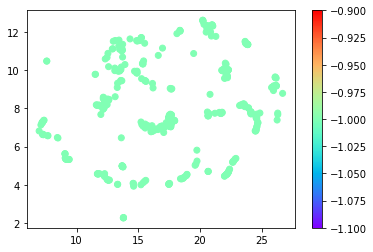

In [13]:
#  HDB sets -1 to noise
plt.scatter(embedding[df['has_dep_diag'] != 0,0],embedding[df['has_dep_diag'] != 0,1], c=cluster_labels, cmap='rainbow') 
plt.colorbar()

In [14]:
newdf = df[(df['has_dep_diag'] != 0)]#] & (df[cluster_labels] == 2)]
newdf = newdf[(cluster_labels == 2)]
newdf

,Unnamed: 0,X,flag,comp_bed_9,mat_dep,mat_age,weight_16,height_16,iq,comp_noint_bed_16,...,dep_score,comp_house,tv_bed_16,creat_14,comp_games,fam_tv_eve,fam_tv_aft,fam_tv_mor,sex,birth_order
